# Predictive Modelling

### step 1: importing the liabraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step2: loading the dataset

In [3]:
df = pd.read_csv(r'C:\machine-learning\cognifyz-internship\Dataset .csv')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (9551, 21)


### step3: handling missing values

In [6]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [29]:
df.dropna(inplace=True)
print("\nDataset shape after dropping missing values:", df.shape)


Dataset shape after dropping missing values: (9542, 21)


In [34]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nColumns after cleaning:")
print(df.columns)


Columns after cleaning:
Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')


### step4: encoding categorical variables

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

In [12]:
print("\nDataset after encoding categorical variables:")
df.head(10)


Dataset after encoding categorical variables:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,4824,3742,6,73,8677,171,172,121.027535,14.565443,920,...,0,1,0,0,0,2,4.8,0,1,314
1,4814,3167,6,73,6047,592,600,121.014101,14.553708,1111,...,0,1,0,0,0,2,4.5,0,1,591
2,4810,2892,6,75,4676,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,3,4.4,1,5,270
3,4827,4700,6,75,8682,860,873,121.056475,14.585318,1126,...,0,0,0,0,0,3,4.9,0,1,365
4,4820,5515,6,75,8681,860,873,121.057508,14.584450,1122,...,0,1,0,0,0,3,4.8,0,1,229
5,5858,2068,6,75,5398,860,873,121.056314,14.583764,497,...,0,0,0,0,0,2,4.4,1,5,336
6,4812,1006,6,93,3976,861,874,120.979667,14.531333,134,...,0,1,0,0,0,3,4.0,1,5,520
7,4813,7170,6,93,3975,861,874,120.979333,14.540000,1681,...,0,1,0,0,0,3,4.2,1,5,677
8,4811,6037,6,93,6971,999,1052,120.980090,14.552990,796,...,0,1,0,0,0,3,4.9,0,1,621
9,4822,3805,6,94,3958,515,521,121.056532,14.572041,892,...,0,1,0,0,0,2,4.8,0,1,532


### step 5: creating a train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

x = df[['country_code', 'city', 'longitude', 'latitude', 'cuisines','has_table_booking',
       'has_online_delivery', 'price_range', 'votes']]
y = df['aggregate_rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


### step6: using linear regression algorithm on the model 

In [39]:
from sklearn.linear_model import LinearRegression

a_model = LinearRegression()
a_model.fit(x_train, y_train)


LinearRegression()

In [79]:
y_pred_a = a_model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 41.342009888742965
R-squared: 0.4541819412184115


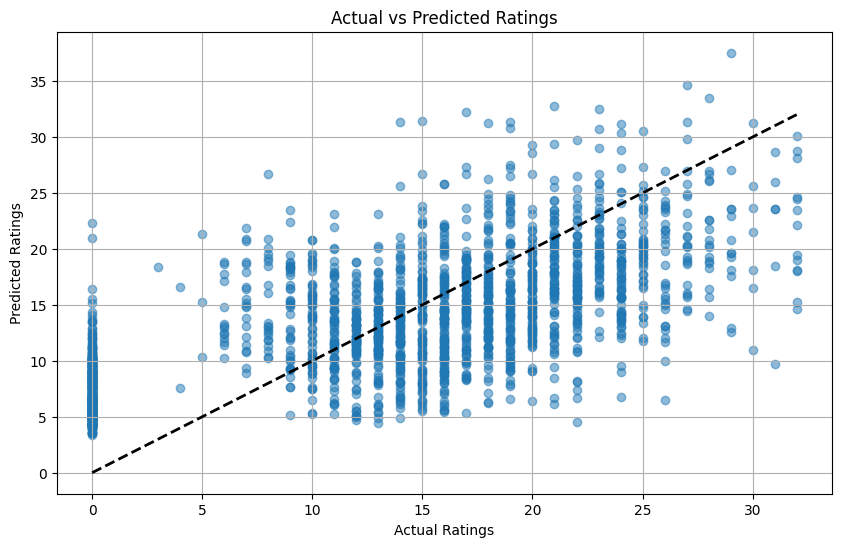

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

### step 7: using decision tree algorithm on the model

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
y_pred_dt = dt_model.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R-squared:", r2_dt)


Decision Tree Mean Squared Error: 24.297537977998953
Decision Tree R-squared: 0.6792116530373518


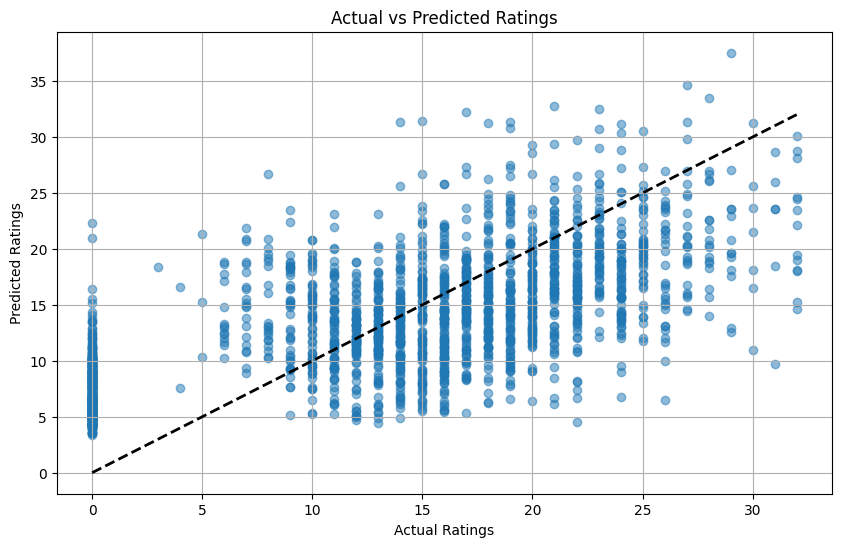

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

### step 8: using random forest algorithm on the model

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [78]:
y_pred_rf = a_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("\nRandom Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)



Random Forest Mean Squared Error: 41.342009888742965
Random Forest R-squared: 0.4541819412184115


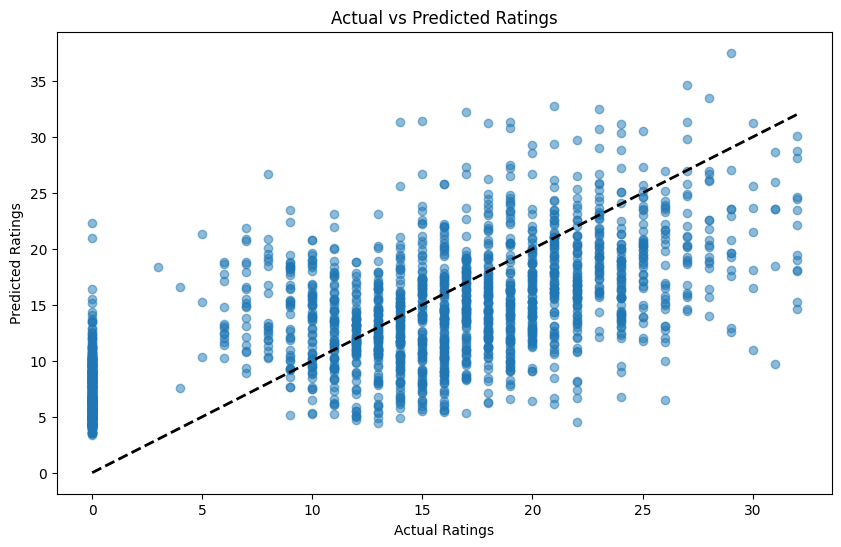

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid= True
plt.show()

### step 9: comparing the performance of the three using residual plot comparision


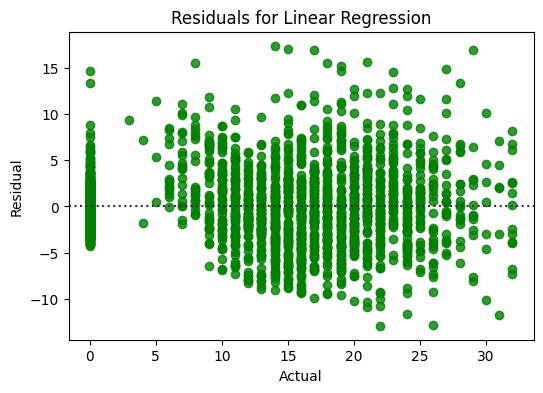

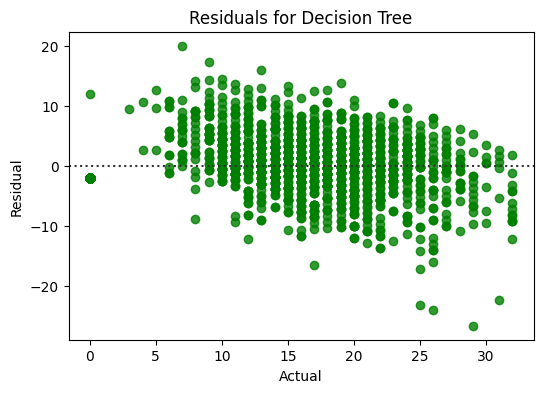

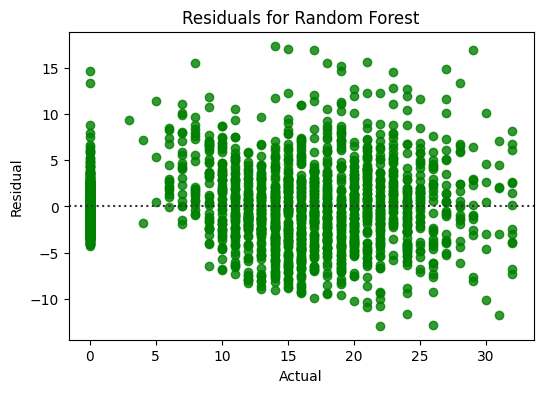

In [83]:

models = {
    'Linear Regression': y_pred_a,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

for name, y_pred in models.items():
    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_test, y=y_pred, color='g', line_kws={'color': 'red'})
    plt.title(f'Residuals for {name}')
    plt.xlabel('Actual')
    plt.ylabel('Residual')
    plt.show()


### end of level 3: task 1